#                                            Exploratory Data Analysis On Hepatitis Dataset

                                                                             - Mohanakumar Thangaraju 

# AIM :

->   To perform Exploratory Data Analysis (EDA) on the given data set to say the story that the data contain

# Loading the Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the Dataset :

          

In [2]:
hepatitis = pd.read_csv('hepatitis_csv.csv')

 Since, the Dataset was in CSV format we used 'pandas - read_csv' in order to import the Data in the Data frame format  

In [3]:
hepatitis.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


 Data has been imported in Dataframe format

# Data shape :


In [4]:
hepatitis.shape

(155, 20)

 The hepatitis dataset consists of 155 Rows and 20 columns or Variables , whereas the Rows represent the patients who were included in the study and columns represent the characteristics recorded for each patient

# EDA - Exploratory Data Analysis :

Exploratory Data Analysis is a way of visualizing, summarizing and interpreting the information that is hidden in rows and columns of a Data.  Exploratory Analysis provides Insights of the Data which will we very much helpful while we move on to Machine Learning and Model Building. 

In [5]:
hepatitis.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


 from the above we can observe some basic information from the numerical variables present in the Dataset.
 
 *    In 'Age' Variable the minimum Age recorded is '7'  and the maximum is '78' .
      So, mean = 41.2 , Standard deviation = 12.56 and median = 39.
      
 *    alk_phosphate and sgot got higher Standard Deviation '51.508' and '89.650'
 
 *    Age has no Null values here since it match the total number of Rows. Whereas other numerical variables consists of null values and 'protime' has count of only 88 , So it contains 67 Null Values 


In [6]:
hepatitis.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

 *  In the given Hepatitis Data, there is 1 int datatypes , 2 Bool datatypes and the remaining variables belong to Object data type 

In [7]:
hepatitis.nunique()

age                49
sex                 2
steroid             2
antivirals          2
fatigue             2
malaise             2
anorexia            2
liver_big           2
liver_firm          2
spleen_palpable     2
spiders             2
ascites             2
varices             2
bilirubin          34
alk_phosphate      83
sgot               84
albumin            29
protime            44
histology           2
class               2
dtype: int64

*  'Age' Variable consists of 49 unique values. 
*   Bilirubin - 34 , protime - 44 , albumin - 29.
*   alk_phosphate with 34 & sgot with 84.(Maximum unique values)
*   And Other variables with 2 
*   Dependent Variable 'class' also have 2 unique values ('live' and 'Dead')

# Null Value Detection :

In [8]:
missing_value = pd.DataFrame({'sum_of_nullvalues':hepatitis.isna().sum(),'percent_missing (in %)':round(hepatitis.isna().sum()*100/len(hepatitis),2)})
missing_value

,sum_of_nullvalues,percent_missing (in %)
age,0,0.00
sex,0,0.00
steroid,1,0.65
antivirals,0,0.00
fatigue,1,0.65
malaise,1,0.65
anorexia,1,0.65
liver_big,10,6.45
liver_firm,11,7.10
spleen_palpable,5,3.23


*  From the above null values percentage 'protime'  has 43.23 % of missing values alone ,which is more than 30% .

*  Basically we should drop the variable/column with huge rate of Null values because it might affect the Model in later part.

*  But Sometimes the variable might be so important that it should be added to the Analysis. At that point we could fill the null values respectively with mean or median or also fill in with most repeated value.

* Here , Lets drop the particular variable assigning a different name. So, we could access the data with protime incase if we want in future cases.

In [10]:
hepatitis_data = hepatitis.drop('protime',axis=1)

*  Now, Lets remove the Null values in every other columns/variables in order to proceed with Vizualisation.  

In [11]:
hepatitis_data = hepatitis_data.dropna()

In [12]:
hepatitis_vizual = hepatitis_data

In [13]:
missing_value_after = pd.DataFrame({'sum_of_nullvalues':hepatitis_data.isna().sum(),'percent_missing (in %)':round(hepatitis_data.isna().sum()*100/len(hepatitis),2)})
missing_value_after

,sum_of_nullvalues,percent_missing (in %)
age,0,0.0
sex,0,0.0
steroid,0,0.0
antivirals,0,0.0
fatigue,0,0.0
malaise,0,0.0
anorexia,0,0.0
liver_big,0,0.0
liver_firm,0,0.0
spleen_palpable,0,0.0


* Thus Null Values have been removed

# Converting Categorical Data :
 
 
*   Many of the Variables are Categorical including the 'class' (dependent variable). In Machine Learning , it has to be numerical in order to proceed. So we could change the categorical variables into Numerical. 

Using Label_Encoder function from Scikit-Lean

In [14]:
from sklearn.preprocessing import LabelEncoder

LB = LabelEncoder

*  Label_Encoder can be used to transform non-numerical labels to numerical labels

*  And useful not only when the variables are binary ,also if they are Nominal or Ordinal 

In [15]:
hepatitis_data['sex']            = LB().fit_transform(hepatitis_data['sex'])
hepatitis_data['steroid']        = LB().fit_transform(hepatitis_data['steroid'])
hepatitis_data['antivirals']     = LB().fit_transform(hepatitis_data['antivirals'])
hepatitis_data['fatigue']        = LB().fit_transform(hepatitis_data['fatigue'])
hepatitis_data['malaise']        = LB().fit_transform(hepatitis_data['malaise'])
hepatitis_data['anorexia']       = LB().fit_transform(hepatitis_data['anorexia'])
hepatitis_data['liver_big']      = LB().fit_transform(hepatitis_data['liver_big'])
hepatitis_data['liver_firm']     = LB().fit_transform(hepatitis_data['liver_firm'])
hepatitis_data['spleen_palpable']= LB().fit_transform(hepatitis_data['spleen_palpable'])
hepatitis_data['spiders']        = LB().fit_transform(hepatitis_data['spiders'])
hepatitis_data['ascites']        = LB().fit_transform(hepatitis_data['ascites'])
hepatitis_data['varices']        = LB().fit_transform(hepatitis_data['varices'])
hepatitis_data['histology']      = LB().fit_transform(hepatitis_data['histology'])
hepatitis_data['class']          = LB().fit_transform(hepatitis_data['class'])


*  Now, we have converted the necessary Categorical Labels to Numeric 

In [16]:
hepatitis_data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,0,1
5,34,0,1,0,0,0,0,1,0,0,0,0,0,0.9,95.0,28.0,4.0,0,1
10,39,0,0,1,0,0,0,0,1,0,0,0,0,1.3,78.0,30.0,4.4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,36,0,1,0,0,0,0,1,0,0,0,0,0,0.6,120.0,30.0,4.0,1,1
151,44,0,1,0,1,0,0,1,1,0,0,0,0,0.9,126.0,142.0,4.3,1,1
152,61,0,0,0,1,1,0,0,1,0,1,0,0,0.8,75.0,20.0,4.1,1,1
153,53,1,0,0,1,0,0,1,0,1,1,0,1,1.5,81.0,19.0,4.1,1,1


# Vizualisation :

-------  correlation :

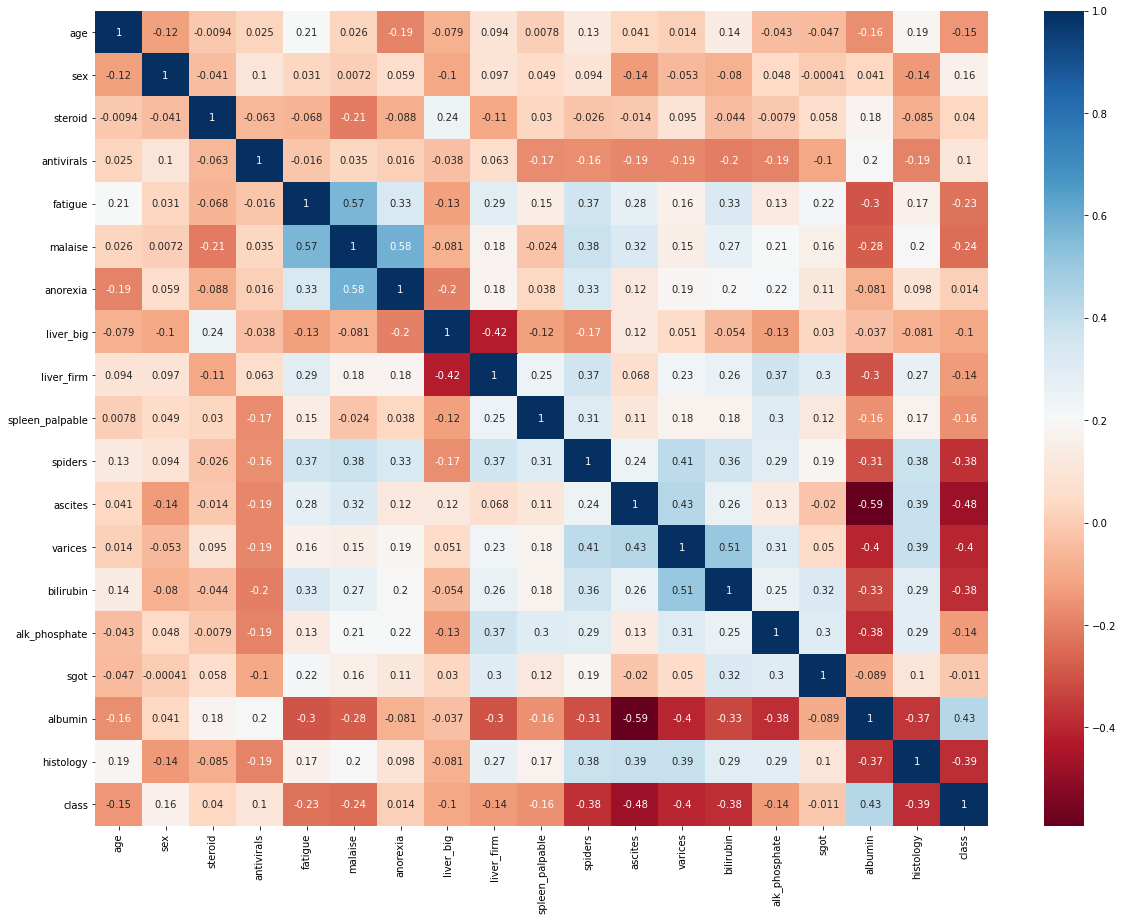

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(hepatitis_data.corr(),annot= True,cmap='RdBu')

*  when we check the multicollinearity between the variables in the hepatitis dataset we found the followings:
    
    1)  anorexia and malaise are the variables with correlation of 0.58
    2)  malaise and fatigue are the variables with correlation of 0.57
    
    and so on.
    
    but, it looks like non of the variables are highly correlated with each other. So, there is no high instance of multicollinearity in our dataset

------ proportion of target :

1    93
0    19
Name: class, dtype: int64

 where  1 - live 
 
       2 - Dead

 
live  -  83.04 %
dead   - 16.96 %


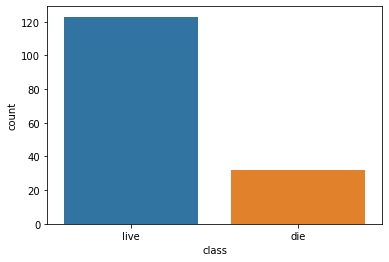

In [22]:

target_class =  sns.countplot(x='class',data=hepatitis)

print(hepatitis_data['class'].value_counts());

total_of_live_patients = (np.sum(hepatitis_data['class'] == 1)/len(hepatitis_data))*100;
total_of_dead_patients = (np.sum(hepatitis_data['class'] == 0)/len(hepatitis_data))*100;
print('\n where  1 - live \n ')
print('       2 - Dead')

print('\n ')
print('live  - ',round(total_of_live_patients,2),'%')
print('dead   -',round(total_of_dead_patients,2),'%')

*  When we look into target class proportion there is class imbalance in it. 

*  count of 93 among the total people from the record are alive and 19 were dead 

*  Around 83 % of people are totally alive in our record 

*  Only 16.96 % of records contain the Death related Data.

<-- Due to this insufficiency there might be class-imbalance issue while creating the Model at later part.

------- Outlier and Boxplot :

C:\Users\matha\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


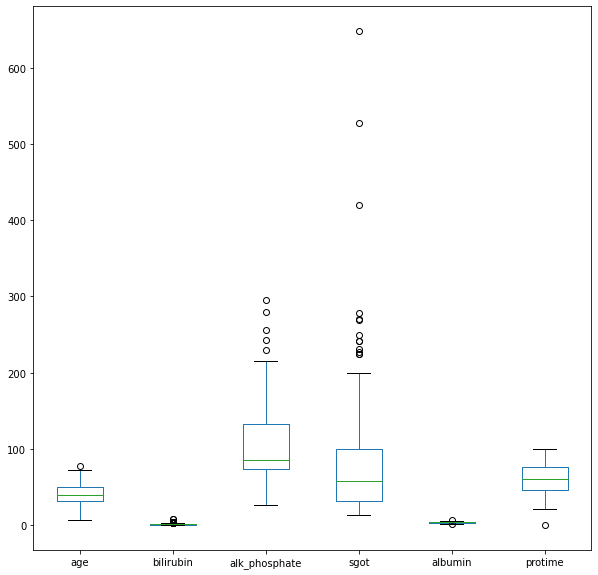

In [57]:
hepatitis.plot(kind='box',figsize=(10,10))

*  Above Box plots were created inorder to find the presence of outliers.

*  The above chart represent the outliers present in each numeric variables.

*  Outlier treatment can be done using available techniques

<<-- one among them is IQR formula based method as follows : 

In [36]:
for i in hepatitis_data:
    print(i)
    Q3,Q1 = np.percentile(hepatitis_data.loc[:,i],[75,25])
    IQR = Q3 - Q1
    min = Q1 - (IQR * 1.5)
    max = Q3 + (IQR * 1.5)
    print('\n')    
    print('minimum limit',min)
    print('maximum Limit',max)
    print('\n')

age


minimum limit 5.0
maximum Limit 77.0


sex


minimum limit 0.0
maximum Limit 0.0


steroid


minimum limit -1.5
maximum Limit 2.5


antivirals


minimum limit 0.0
maximum Limit 0.0


fatigue


minimum limit -1.5
maximum Limit 2.5


malaise


minimum limit -1.5
maximum Limit 2.5


anorexia


minimum limit 0.0
maximum Limit 0.0


liver_big


minimum limit 1.0
maximum Limit 1.0


liver_firm


minimum limit -1.5
maximum Limit 2.5


spleen_palpable


minimum limit 0.0
maximum Limit 0.0


spiders


minimum limit -1.5
maximum Limit 2.5


ascites


minimum limit 0.0
maximum Limit 0.0


varices


minimum limit 0.0
maximum Limit 0.0


bilirubin


minimum limit -0.34999999999999987
maximum Limit 2.4499999999999997


alk_phosphate


minimum limit -20.25
maximum Limit 225.75


sgot


minimum limit -72.0
maximum Limit 200.0


albumin


minimum limit 2.4499999999999997
maximum Limit 5.25


histology


minimum limit -1.5
maximum Limit 2.5


class


minimum limit 1.0
maximum Limit 1.0




<<   by identifying the upper and lower limits we can discharge the values and avoid the ouliers


-------split based on Sex :

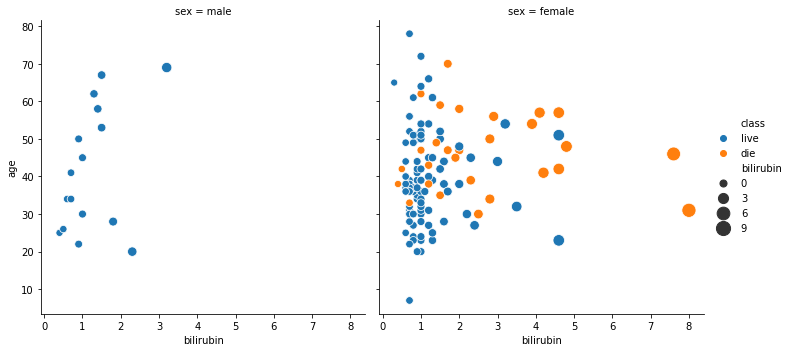

In [23]:
sns.relplot(x='bilirubin',y='age',data=hepatitis,size='bilirubin',sizes=(50,200),hue='class',col='sex')

* In the above chart, categorization based on variation 'sex', (male and female)

* From our hepatitis Dataset , it represents no death in male.

* And bigger circles represent people with higher bilirubin rate. But however, age and bilirubin has no high correlation based on our data.  

------ Range of Death rate based on age :

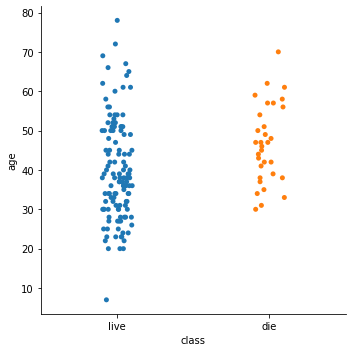

In [37]:
sns.catplot(x='class',y='age',data=hepatitis)

*  From the above Cat plot,  The people within the age category of '30 - 62' died.

*  But at the same time dataset has its limitations due to imbalanced record

<< -- Imbalance in Sex is represented in the below countplot between male and female

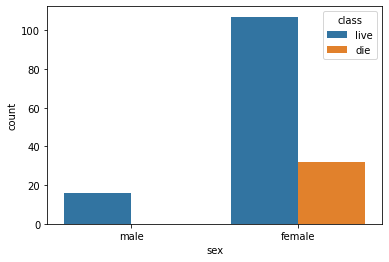

In [30]:
sns.countplot(x='sex',hue='class',data=hepatitis)

------ Pair plot to Obtain relation between the numerical variables :

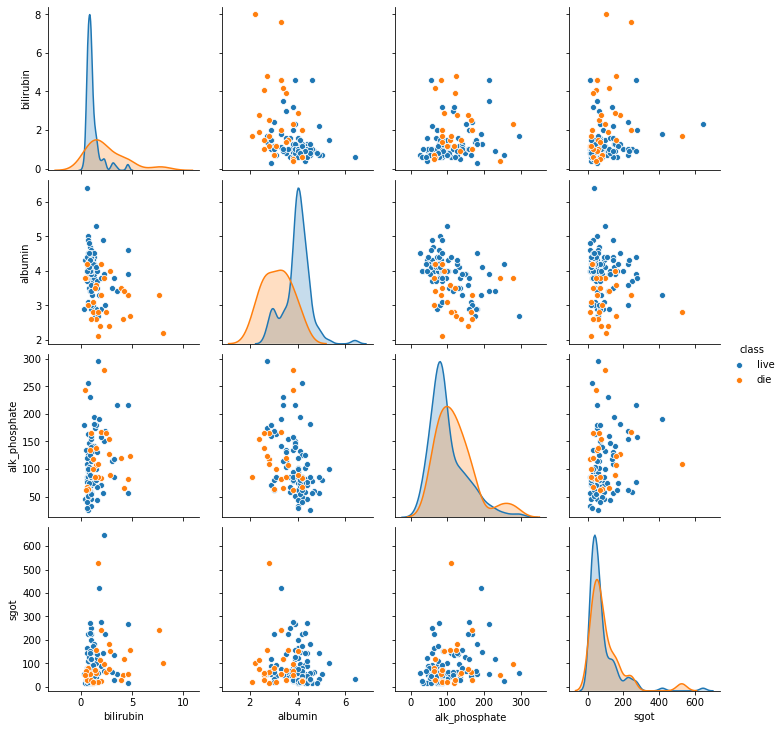

In [29]:
sns.pairplot(hepatitis, x_vars = ['bilirubin', 'albumin', 'alk_phosphate', 'sgot'], y_vars = ['bilirubin', 'albumin', 'alk_phosphate', 'sgot'], hue = 'class')

*  From the above pairplot :

*  'died people' distplot has been right skewed in all the plots and 'live' has been normal in only albumin.

*   And linearity has not been found in these variables

# ThereFore,  The Exploratory Data Analysis for the Hepatitis Dataset

keypoints : 

*  The Dataset suffers from Class Imbalance.
*  The Variables within the Data has no multicollinearity inbetween them
*  The Variable named 'protime' was 48% full of Null values
*  No Male has died due to Hepatitis based on the Dataset 